# Covid-19 in the Philippines

Data as of January 7, 2022

Source: DOH Data Drop

Metadata: https://docs.google.com/spreadsheets/d/1rD77PMdxN6JMVeYmk7mvgDNtEHJt8Du6ozaLm_Qok0Q/edit#gid=1714687638

Download the CSV files from the DOH Data Drop and save them within the PATH. We'll start by combining the three CSVs into one data frame.

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 1000)
df = pd.concat(
    map(pd.read_csv, ['DOH COVID Data Drop_ 20220107 - 04 Case Information_batch_0.csv', 'DOH COVID Data Drop_ 20220107 - 04 Case Information_batch_1.csv', 'DOH COVID Data Drop_ 20220107 - 04 Case Information_batch_2.csv']), ignore_index=True)
df

/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/core/reshape/concat.py:294: DtypeWarning: Columns (15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  op = _Concatenator(


,CaseCode,Age,AgeGroup,Sex,DateSpecimen,DateResultRelease,DateRepConf,DateDied,DateRecover,RemovalType,Admitted,RegionRes,ProvRes,CityMunRes,CityMuniPSGC,BarangayRes,BarangayPSGC,HealthStatus,Quarantined,DateOnset,Pregnanttab,ValidationStatus
0,C404174,38.0,35 to 39,FEMALE,NaN,2020-01-30,2020-01-30,NaN,NaN,RECOVERED,NaN,Region VII: Central Visayas,NEGROS ORIENTAL,DUMAGUETE CITY (CAPITAL),PH074610000,NaN,NaN,RECOVERED,NO,2020-01-21,NO,"Removal Type is ""Recovered"", but no Recovered ..."
1,C462688,44.0,40 to 44,MALE,NaN,2020-01-30,2020-02-03,2020-02-01,NaN,DIED,NaN,Region VII: Central Visayas,NEGROS ORIENTAL,DUMAGUETE CITY (CAPITAL),PH074610000,NaN,NaN,DIED,NO,2020-01-18,NaN,NaN
2,C387710,60.0,60 to 64,FEMALE,2020-01-23,2020-01-30,2020-02-05,NaN,2020-01-31,RECOVERED,YES,Region VII: Central Visayas,BOHOL,PANGLAO,PH071233000,NaN,NaN,RECOVERED,NO,2020-01-21,NO,Age or Birthdate is Invalid\nCase has Admittin...
3,C498051,63.0,60 to 64,MALE,2020-03-05,NaN,2020-03-06,2020-03-11,NaN,DIED,NO,Region IV-A: CALABARZON,RIZAL,CAINTA,PH045805000,NaN,NaN,DIED,NO,NaN,NaN,"Case has Lab Result, but Result Date is blank"
4,C377460,49.0,45 to 49,MALE,NaN,NaN,2020-03-06,NaN,NaN,RECOVERED,YES,Region IV-A: CALABARZON,BATANGAS,SANTO TOMAS,PH041028000,NaN,NaN,RECOVERED,NO,NaN,NaN,"Health Status is ""Recovered"", but no Date Reco..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2910659,C96776068,11.0,10 to 14,MALE,2022-01-03,2022-01-04,2022-01-07,NaN,NaN,NaN,NaN,NCR,NCR,CITY OF MALABON,PH137502000,NaN,NaN,MILD,NO,NaN,NaN,NaN
2910660,C5222112,42.0,40 to 44,MALE,2022-01-05,2022-01-06,2022-01-07,NaN,NaN,NaN,NaN,Region VII: Central Visayas,NEGROS ORIENTAL,DUMAGUETE CITY (CAPITAL),PH074610000,POBLACION NO. 4 (BARANGAY 4),PH074610022,MILD,NO,2021-12-30,NaN,NaN
2910661,C74840961,27.0,25 to 29,MALE,2022-01-03,2022-01-06,2022-01-07,NaN,NaN,NaN,NaN,NCR,NCR,CITY OF MALABON,PH137502000,DAMPALIT,PH137502006,MILD,NO,NaN,NaN,NaN
2910662,C48470344,52.0,50 to 54,FEMALE,2022-01-04,2022-01-05,2022-01-07,NaN,NaN,NaN,NaN,NCR,NCR,CITY OF LAS PIÑAS,PH137601000,PAMPLONA DOS,PH137601013,MILD,NO,2021-12-30,NO,NaN


We basically combined all three CSVs into one file. 
You can save this single file into a CSV if you want to. 

In [60]:
df.DateRepConf = pd.to_datetime(df.DateRepConf, format="%Y-%m-%d")
df.DateDied = pd.to_datetime(df.DateDied, format="%Y-%m-%d")
df.DateRecover = pd.to_datetime(df.DateRecover, format="%Y-%m-%d")
df.DateOnset = pd.to_datetime(df.DateOnset, format="%Y-%m-%d")
df.DateResultRelease = pd.to_datetime(df.DateResultRelease, format="%Y-%m-%d")
df.DateSpecimen = pd.to_datetime(df.DateSpecimen, format="%Y-%m-%d")

In [61]:
df.dtypes
#This checks whether we successfully converted the columns above into datetime.

CaseCode                     object
Age                         float64
AgeGroup                     object
Sex                          object
DateSpecimen         datetime64[ns]
DateResultRelease    datetime64[ns]
DateRepConf          datetime64[ns]
DateDied             datetime64[ns]
DateRecover          datetime64[ns]
RemovalType                  object
Admitted                     object
RegionRes                    object
ProvRes                      object
CityMunRes                   object
CityMuniPSGC                 object
BarangayRes                  object
BarangayPSGC                 object
HealthStatus                 object
Quarantined                  object
DateOnset            datetime64[ns]
Pregnanttab                  object
ValidationStatus             object
dtype: object

# Checking the data

Look for potential duplicates through the **Case Code** column. **True** means there are duplicates.

In [62]:
df.duplicated(subset=['CaseCode'])

0          False
1          False
2          False
3          False
4          False
           ...  
2910659    False
2910660    False
2910661    False
2910662    False
2910663    False
Length: 2910664, dtype: bool

There are also issues with **NaNs** which means there was no data input. We tackle the NaNs as we go through different columns of the database.

# Case data

Note: Just remove **.tail()** to get all dates here. **.tail()** shows the last entries while the number inside paranthesis signify how many last entries are shown. Default shows last 10 entries. Alternatively: **.head()**

## DateRepConf

Pertains to data when cases are publicly reported **(this is what is closely followed and reported in the media).** Caveat is this can include case positives from previous days because of delays in test processing and reporting.

For instance, cases may be reported on January 2, but based on testing data on December 31.

Furthemore, data from previous days may be subject to change as DOH said it is constantly reviewing the reports' veracity and removing some potential duplicates.

In [63]:
df.resample('D', on='DateRepConf').CaseCode.count().tail(10)

DateRepConf
2021-12-29      888
2021-12-30     1619
2021-12-31     2951
2022-01-01     3615
2022-01-02     4598
2022-01-03     4079
2022-01-04     5429
2022-01-05    10765
2022-01-06    17204
2022-01-07    21819
Freq: D, Name: CaseCode, dtype: int64

# Two week rolling case average

You can change the time frame of the rolling average by changing the number of **days** inside the paranthesis after **rolling.**

In [66]:
df.resample('D', on='DateRepConf').CaseCode.count().rolling(14).mean().round().tail(10)

DateRepConf
2021-12-29     366.0
2021-12-30     461.0
2021-12-31     630.0
2022-01-01     868.0
2022-01-02    1182.0
2022-01-03    1454.0
2022-01-04    1830.0
2022-01-05    2581.0
2022-01-06    3789.0
2022-01-07    5326.0
Freq: D, Name: CaseCode, dtype: float64

Text(0, 0.5, 'Cases')

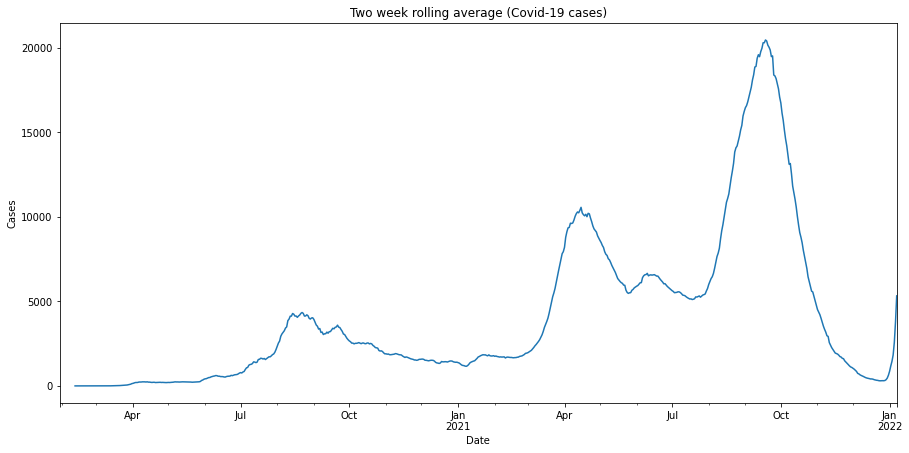

In [67]:
ax = df.resample('D', on='DateRepConf').CaseCode.count().rolling(14).mean().plot(title='Two week rolling average (Covid-19 cases)', figsize = (15, 7))
ax.set_xlabel("Date")
ax.set_ylabel("Cases")

In [68]:
df.resample('D', on='DateRepConf').CaseCode.count().tail(25)

DateRepConf
2021-12-14      235
2021-12-15      233
2021-12-16      288
2021-12-17      578
2021-12-18      290
2021-12-19      202
2021-12-20      263
2021-12-21      168
2021-12-22      260
2021-12-23      286
2021-12-24      308
2021-12-25      433
2021-12-26      432
2021-12-27      316
2021-12-28      410
2021-12-29      888
2021-12-30     1619
2021-12-31     2951
2022-01-01     3615
2022-01-02     4598
2022-01-03     4079
2022-01-04     5429
2022-01-05    10765
2022-01-06    17204
2022-01-07    21819
Freq: D, Name: CaseCode, dtype: int64

## DateOnset

Pertains to cases when date of illness or when symptoms manifest. Sometimes, people are not tested until cases manifest and processing of cases take time. DateOnset records cases based on when the illness first manifested, not when test results were released.

DOH said when DateOnset cannot be confirmed, the agency uses DateSpecimen (date of specimen collection for testing, see below) as proxy.

In [69]:
df.resample('D', on='DateOnset').CaseCode.count().tail(10)

DateOnset
2021-12-29     776
2021-12-30     869
2021-12-31    1014
2022-01-01    1487
2022-01-02    1548
2022-01-03    1891
2022-01-04    1169
2022-01-05     125
2022-01-06       0
2022-01-07       1
Name: CaseCode, dtype: int64

## DateSpecimen

Pertains to when specimen was collected from suspected case for Covid-19 testing. Data show those who tested positive after testing, but date used to report case is based on when the specimen is collected, instead of when results came out positive.

DOH said when DateOnset cannot be confirmed, the agency uses DateSpecimen (date of specimen collection for testing) as proxy.

In [70]:
df.resample('D', on='DateSpecimen').CaseCode.count().tail(10)

DateSpecimen
2021-12-28     2498
2021-12-29     3609
2021-12-30     4354
2021-12-31     4836
2022-01-01     4527
2022-01-02     8814
2022-01-03    21569
2022-01-04    15457
2022-01-05     4342
2022-01-06       28
Name: CaseCode, dtype: int64

## DateRecover

Pertains to date when cases recovered from Covid-19. Not used in reporting "recoveries" data every day. 

In [71]:
df[df.RemovalType=="RECOVERED"].resample('D', on='DateRecover').size().tail(10)

DateRecover
2021-12-27    25
2021-12-28    33
2021-12-29    28
2021-12-30    35
2021-12-31    35
2022-01-01    32
2022-01-02    44
2022-01-03    35
2022-01-04    15
2022-01-05     1
dtype: int64

## DateDied

Pertains to date when cases died from Covid-19. Not used in reporting "deaths" data every day. 

In [72]:
df[df.RemovalType=="DIED"].resample('D', on='DateDied').size().tail(10)

DateDied
2021-12-26     2
2021-12-27     5
2021-12-28     8
2021-12-29    12
2021-12-30    14
2021-12-31    14
2022-01-01     4
2022-01-02     2
2022-01-03     6
2022-01-04     4
dtype: int64

Note: Clearly when used to resample, DateRecovered and DateDied columns underestimate both figures as reported. This can be due to a number of reasons, including some deaths and recoveries bearing no date.

# Which regions have the highest number of Covid-19 cases so far?

In [73]:
df.RegionRes.value_counts(normalize=True, dropna=False) * 100
#ROF stands for returning overseas Filipinos
#0.11% have no indicated regional location.

NCR                               31.285370
Region IV-A: CALABARZON           17.525520
Region III: Central Luzon          9.871012
Region VII: Central Visayas        5.323493
Region VI: Western Visayas         5.260758
Region II: Cagayan Valley          4.764686
Region XI: Davao Region            3.677718
Region I: Ilocos Region            3.640475
CAR                                3.207481
Region X: Northern Mindanao        2.954206
Region XII: SOCCSKSARGEN           2.075506
Region IX: Zamboanga Peninsula     1.854663
Region VIII: Eastern Visayas       1.841573
Region V: Bicol Region             1.796635
CARAGA                             1.756094
Region IV-B: MIMAROPA              1.302933
ROF                                1.060858
BARMM                              0.683968
NaN                                0.117052
Name: RegionRes, dtype: float64

Interpretation: Nearly half-- or nearly 49%-- of Covid-19 cases were detected in Metro Manila and Calabarzon.

# Which provinces have the highest number of Covid-19 cases so far?

In [74]:
df.ProvRes.value_counts(dropna=False, normalize=True) * 100
#Over 42,000 (1.5%) have no information into provincial location.

NCR                                 31.053361
CAVITE                               5.752639
LAGUNA                               4.351997
CEBU                                 3.746843
RIZAL                                3.736604
BULACAN                              3.714754
BATANGAS                             2.578484
PAMPANGA                             2.405018
DAVAO DEL SUR                        2.300712
NEGROS OCCIDENTAL                    2.067604
ISABELA                              2.058568
ILOILO                               2.047471
CAGAYAN                              1.821681
BENGUET                              1.800414
PANGASINAN                           1.556930
NaN                                  1.466195
MISAMIS ORIENTAL                     1.290839
ZAMBOANGA DEL SUR                    1.261568
SOUTH COTABATO                       1.171142
NUEVA ECIJA                          1.114763
BATAAN                               1.104353
QUEZON                            

# Which municipalities?

In [75]:
df.CityMunRes.value_counts(dropna=False, normalize=True).head(25) * 100
#Over 55,000 (nearly 2%) people infected have no information on their municipal location.

QUEZON CITY                   6.449834
CITY OF MANILA                3.908971
CALOOCAN CITY                 2.307412
TAGUIG CITY                   2.254743
CITY OF PASIG                 2.190978
CITY OF MAKATI                2.124773
NaN                           1.933408
DAVAO CITY                    1.891768
CITY OF PARAÑAQUE             1.795226
CEBU CITY (CAPITAL)           1.471657
CITY OF VALENZUELA            1.409575
PASAY CITY                    1.398135
CITY OF LAS PIÑAS             1.284655
CITY OF MANDALUYONG           1.219893
CITY OF MUNTINLUPA            1.063091
BACOOR CITY                   1.058556
BAGUIO CITY                   1.049795
CITY OF ANTIPOLO (CAPITAL)    1.038973
CITY OF MARIKINA              1.012759
CITY OF DASMARIÑAS            0.881929
CITY OF MALABON               0.846886
IMUS CITY                     0.841698
BACOLOD CITY (CAPITAL)        0.841217
ZAMBOANGA CITY                0.829811
ILOILO CITY (CAPITAL)         0.786968
Name: CityMunRes, dtype: 

Interpretation: Six cities from Metro Manila top the list of number of people infected with Covid-19. Davao City in Mindanao follow them.

# Track cases per day per province

Warning: This can be quite heavy because of the number of provinces (87) involved. But the beauty of this is you can save this df into a separate CSV (using the df name **'df_prov'**) if you'd like. 

Code also applicable to municipal, regional and barangay level. But be careful as the data get more granular as there could be some problem (see below).

In [76]:
df_prov = df.pivot_table(columns="ProvRes", index='DateRepConf', values='CaseCode', aggfunc='count', fill_value='0', dropna=False)
df_prov.tail(25)

ProvRes,ABRA,AGUSAN DEL NORTE,AGUSAN DEL SUR,AKLAN,ALBAY,ANTIQUE,APAYAO,AURORA,BASILAN,BATAAN,BATANES,BATANGAS,BENGUET,BILIRAN,BOHOL,BUKIDNON,BULACAN,CAGAYAN,CAMARINES NORTE,CAMARINES SUR,CAMIGUIN,CAPIZ,CATANDUANES,CAVITE,CEBU,CITY OF ISABELA (NOT A PROVINCE),COTABATO (NORTH COTABATO),COTABATO CITY (NOT A PROVINCE),DAVAO DE ORO,DAVAO DEL NORTE,DAVAO DEL SUR,DAVAO OCCIDENTAL,DAVAO ORIENTAL,DINAGAT ISLANDS,EASTERN SAMAR,GUIMARAS,IFUGAO,ILOCOS NORTE,ILOCOS SUR,ILOILO,ISABELA,KALINGA,LA UNION,LAGUNA,LANAO DEL NORTE,LANAO DEL SUR,LEYTE,MAGUINDANAO,MARINDUQUE,MASBATE,MISAMIS OCCIDENTAL,MISAMIS ORIENTAL,MOUNTAIN PROVINCE,NCR,NEGROS OCCIDENTAL,NEGROS ORIENTAL,NORTHERN SAMAR,NUEVA ECIJA,NUEVA VIZCAYA,OCCIDENTAL MINDORO,ORIENTAL MINDORO,PALAWAN,PAMPANGA,PANGASINAN,QUEZON,QUIRINO,RIZAL,ROMBLON,SAMAR (WESTERN SAMAR),SARANGANI,SIQUIJOR,SORSOGON,SOUTH COTABATO,SOUTHERN LEYTE,SULTAN KUDARAT,SULU,SURIGAO DEL NORTE,SURIGAO DEL SUR,TARLAC,TAWI-TAWI,ZAMBALES,ZAMBOANGA DEL NORTE,ZAMBOANGA DEL SUR,ZAMBOANGA SIBUGAY
DateRepConf,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-12-14,1.0,2.0,0,1.0,0,0,0,0,0,3.0,0,1.0,4.0,0,1.0,1.0,9.0,2.0,0,2.0,0,0,0,11.0,3.0,3.0,0,1.0,2.0,2.0,12.0,1.0,1.0,2.0,0,2.0,4.0,0,3.0,7.0,5.0,0,10.0,5.0,3.0,2.0,1.0,0,0,0,0,2.0,0,54.0,4.0,6.0,0,4.0,2.0,0,1.0,7.0,1.0,6.0,0,1.0,9.0,2.0,0,0,0,0,8.0,1.0,1.0,0,1.0,0,2.0,2.0,0,0,7.0,0
2021-12-15,0,2.0,0,0,4.0,1.0,0,0,1.0,5.0,0,5.0,4.0,0,0,0,5.0,2.0,0,0,0,3.0,2.0,7.0,9.0,0,1.0,0,1.0,5.0,3.0,1.0,0,0,0,0,0,1.0,0,9.0,2.0,0,0,3.0,25.0,0,1.0,0,2.0,0,1.0,1.0,0,45.0,7.0,7.0,0,4.0,0,1.0,5.0,3.0,0,5.0,0,1.0,2.0,0,0,2.0,0,0,7.0,5.0,0,3.0,1.0,0,5.0,0,0,0,12.0,0
2021-12-16,0,4.0,0,1.0,2.0,1.0,0,1.0,0,3.0,0,3.0,5.0,0,0,0,6.0,10.0,0,1.0,1.0,0,0,9.0,14.0,0,1.0,0,1.0,4.0,5.0,5.0,1.0,0,0,0,0,1.0,1.0,10.0,5.0,1.0,2.0,8.0,0,1.0,1.0,1.0,0,0,0,9.0,3.0,90.0,8.0,13.0,0,0,1.0,0,4.0,4.0,0,8.0,0,0,8.0,0,1.0,0,1.0,0,6.0,0,0,1.0,0,0,1.0,0,1.0,3.0,14.0,0
2021-12-17,0,4.0,6.0,2.0,0,2.0,1.0,0,1.0,12.0,2.0,28.0,4.0,0,2.0,1.0,8.0,6.0,0,3.0,1.0,2.0,0,30.0,13.0,2.0,0,0,4.0,1.0,1.0,0,2.0,0,0,0,2.0,1.0,5.0,11.0,6.0,0,11.0,12.0,7.0,0,2.0,0,0,0,0,5.0,0,168.0,11.0,13.0,0,12.0,2.0,5.0,3.0,9.0,4.0,24.0,2.0,0,34.0,2.0,2.0,0,1.0,2.0,4.0,3.0,1.0,1.0,1.0,2.0,10.0,2.0,12.0,0,6.0,0
2021-12-18,0,1.0,4.0,0,2.0,0,0,0,0,2.0,1.0,4.0,6.0,0,3.0,0,5.0,2.0,0,1.0,0,5.0,0,15.0,4.0,2.0,1.0,0,1.0,0,6.0,0,0,0,0,0,0,0,2.0,27.0,14.0,0,4.0,2.0,0,1.0,1.0,2.0,0,0,1.0,4.0,1.0,66.0,12.0,9.0,0,3.0,3.0,3.0,3.0,1.0,0,15.0,4.0,1.0,5.0,0,0,0,0,0,7.0,0,2.0,0,0,1.0,2.0,1.0,0,5.0,7.0,0
2021-12-19,0,0,4.0,0,2.0,0,0,0,0,1.0,0,4.0,1.0,0,0,0,8.0,5.0,0,0,0,0,0,9.0,0,0,0,0,1.0,0,1.0,0,1.0,0,0,0,2.0,1.0,3.0,9.0,11.0,0,0,7.0,0,0,0,0,0,0,0,1.0,1.0,55.0,14.0,14.0,0,1.0,2.0,0,2.0,7.0,5.0,4.0,2.0,0,15.0,0,0,2.0,0,0,1.0,0,0,0,0,0,1.0,0,0,0,0,0
2021-12-20,0,1.0,0,0,0,0,2.0,0,0,2.0,0,4.0,2.0,0,3.0,0,1.0,2.0,0,0,0,1.0,0,15.0,5.0,3.0,0,0,1.0,2.0,1.0,1.0,0,0,1.0,0,0,1.0,0,4.0,3.0,1.0,1.0,3.0,0,1.0,3.0,1.0,0,0,1.0,1.0,0,55.0,5.0,1.0,0,3.0,0,0,2.0,0,1.0,6.0,0,2.0,11.0,0,0,0,0,0,5.0,0,1.0,0,0,0,5.0,0,1.0,1.0,17.0,2.0
2021-12-21,1.0,2.0,1.0,0,0,0,3.0,0,0,1.0,0,2.0,1.0,0,2.0,2.0,1.0,1.0,0,1.0,0,0,0,11.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0,4.0,0,0,0,0,2.0,0,0,3.0,2.0,0,5.0,4.0,1.0,0,0,0,0,0,1.0,2.0,0,40.0,13.0,1.0,0,1.0,2.0,0,0,3.0,4.0,2.0,0,1.0,5.0,0,0,0,0,0,2.0,0,0,0,0,1.0,1.0,0,1.0,0,4.0,1.0
2021-12-22,1.0,2.0,3.0,0,1.0,1.0,1.0,0,1.0,2.0,1.0,1.0,2.0,0,1.0,0,6.0,3.0,0,0,0,3.0,0,9.0,4.0,0,0,1.0,6.0,1.0,6.0,0,0,0,0,1.0,1.0,1.0,1.0,6.0,6.0,0,3.0,7.0,4.0,0,0,0,1.0,0,0,1.0,0,71.0,7.0,2.0,0,5.0,2.0,3.0,3.0,0,1.0,10.0,3.0,0,9.0,0,0,2.0,0,0,6.0,0,0,0,0,2.0,5.0,0,0,1.0,12.0,0


Strictly speaking, you can pivot table **municipal and barangay** data as well to get a similar table like above. However, there can be some problems with how the data was input. For instance, at the municipal level, there are towns with similar names like **ALCALA** which is a town's name in both **Ilocos Region** and **Cagayan.**

The problem is pandas does not differentiate between the two ALCALAs when pivoting and just merge their numbers even if **they pertain to different locations.** My solution then is to just use **groupby** and then transform your data into a df through **to_frame()** to enable export to CSV. 

However, it's kind of messy **(Remove hashtag and see below)**.

In [77]:
#df_munc = df.groupby(["ProvRes", "CityMunRes"]).resample('D', on='DateRepConf').size().to_frame()
#df_munc.tail(10)

# How is a location's infection tally through time (one loc at a time)?

Applicable for provinces, municipalities, regions.

In [78]:
#Example for region
df[df.RegionRes=="NCR"].resample('D', on='DateRepConf').CaseCode.count().tail(10)

DateRepConf
2021-12-29      560
2021-12-30     1107
2021-12-31     1987
2022-01-01     2546
2022-01-02     3366
2022-01-03     2874
2022-01-04     3861
2022-01-05     7494
2022-01-06    11678
2022-01-07    13718
Freq: D, Name: CaseCode, dtype: int64

In [79]:
#Example for municipalities
df[df.CityMunRes=="CITY OF PASIG"].resample('D', on='DateRepConf').CaseCode.count().tail(10)

DateRepConf
2021-12-29     14
2021-12-30     41
2021-12-31     76
2022-01-01    104
2022-01-02    120
2022-01-03    127
2022-01-04    281
2022-01-05    448
2022-01-06    746
2022-01-07    923
Freq: D, Name: CaseCode, dtype: int64

<AxesSubplot:title={'center':'Pasig City cases'}, xlabel='DateRepConf'>

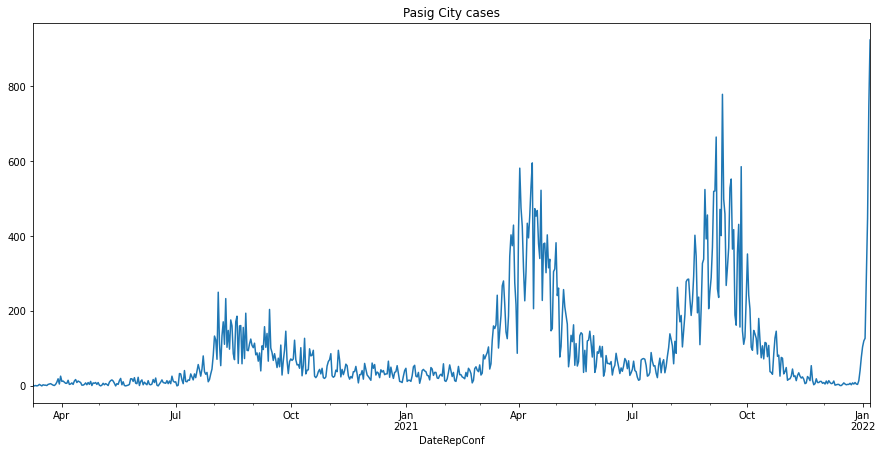

In [80]:
df[df.CityMunRes=="CITY OF PASIG"].resample('D', on='DateRepConf').CaseCode.count().plot(title="Pasig City cases", figsize = (15, 7))

# How young/old are the infected?

In [81]:
df.AgeGroup.value_counts(normalize=True, dropna=False) * 100
#0.1% of people infected did not indicate age.

25 to 29    13.812587
30 to 34    12.336773
20 to 24    10.163695
35 to 39     9.575616
40 to 44     8.259765
45 to 49     6.890077
50 to 54     6.480721
55 to 59     5.832346
60 to 64     4.653509
15 to 19     4.600187
65 to 69     3.532974
10 to 14     3.183019
70 to 74     2.574086
5 to 9       2.370112
0 to 4       2.270032
80+          1.833980
75 to 79     1.537141
NaN          0.093381
Name: AgeGroup, dtype: float64

Text(0, 0.5, 'Cases')

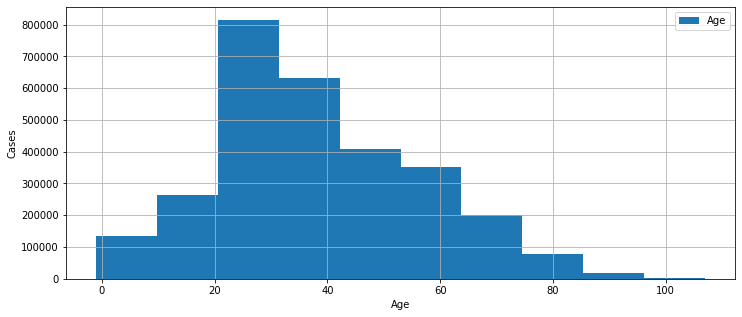

In [82]:
ax= df.Age.hist(legend=True, figsize = (12, 5))
ax.set_xlabel("Age")
ax.set_ylabel("Cases")

# How many males and females? How many are admitted to hospital?

**normalize=True** will get you the percentage share.

In [83]:
df.Sex.value_counts(dropna=False, normalize=True) * 100
#Nearly equal number of females and males infected with Covid-19

FEMALE    50.138147
MALE      49.861853
Name: Sex, dtype: float64

In [84]:
df.Admitted.value_counts(dropna=False)
#NaN means no answer

NaN    1863032
NO      937311
YES     110321
Name: Admitted, dtype: int64

# Testing

We now go to testing data, which is contained in a separate CSV file from the DOH Data Drop. We read through the file first.

Notice again how there are **NaNs** in some rows. Some of them you can ignore because of the type of data (i.e. **daily_output_unique_individuals** where NaN essentially means there were no test conducted that day.

You can check whether they have a significant impact on the broader picture by running **isna** in certain columns or putting **dropna=False** in your **value_counts**.

Try this:
df[df.daily_output_unique_individuals.isna()]

In [85]:
df_test = pd.read_csv("DOH COVID Data Drop_ 20220107 - 07 Testing Aggregates.csv")
df_test

,facility_name,report_date,avg_turnaround_time,daily_output_samples_tested,daily_output_unique_individuals,daily_output_positive_individuals,daily_output_negative_individuals,daily_output_equivocal,daily_output_invalid,remaining_available_tests,backlogs,cumulative_samples_tested,cumulative_unique_individuals,cumulative_positive_individuals,cumulative_negative_individuals,pct_positive_cumulative,pct_negative_cumulative,validation_status
0,A Star Laboratories,2020-12-08,24.0,15.0,15.0,1.0,14.0,0.0,0.0,8.0,0.0,15,15,1,14,0.07,0.93,NaN
1,A Star Laboratories,2020-12-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,15,1,14,0.07,0.93,NaN
2,A Star Laboratories,2020-12-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,15,1,14,0.07,0.93,NaN
3,A Star Laboratories,2020-12-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,15,1,14,0.07,0.93,NaN
4,A Star Laboratories,2020-12-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,15,1,14,0.07,0.93,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123200,Zamboanga del Sur Medical Center PCR Laboratory,2022-01-02,48.0,15.0,15.0,1.0,14.0,0.0,0.0,0.0,0.0,34136,33791,8833,24958,0.26,0.74,NaN
123201,Zamboanga del Sur Medical Center PCR Laboratory,2022-01-03,48.0,0.0,0.0,0.0,0.0,0.0,0.0,7570.0,0.0,34136,33791,8833,24958,0.26,0.74,NaN
123202,Zamboanga del Sur Medical Center PCR Laboratory,2022-01-04,48.0,43.0,43.0,3.0,40.0,0.0,0.0,7507.0,0.0,34179,33834,8836,24998,0.26,0.74,NaN
123203,Zamboanga del Sur Medical Center PCR Laboratory,2022-01-05,48.0,144.0,144.0,7.0,137.0,0.0,0.0,7343.0,0.0,34323,33978,8843,25135,0.26,0.74,NaN


# Transform dates to datetime format

In [86]:
df_test.dtypes
#Meant to check what type of data are we dealing about. Our concern here are the dates.
#We need to convert them to datetime format from object format to allow us to analyze data through time.

facility_name                         object
report_date                           object
avg_turnaround_time                  float64
daily_output_samples_tested          float64
daily_output_unique_individuals      float64
daily_output_positive_individuals    float64
daily_output_negative_individuals    float64
daily_output_equivocal               float64
daily_output_invalid                 float64
remaining_available_tests            float64
backlogs                             float64
cumulative_samples_tested              int64
cumulative_unique_individuals          int64
cumulative_positive_individuals        int64
cumulative_negative_individuals        int64
pct_positive_cumulative              float64
pct_negative_cumulative              float64
validation_status                     object
dtype: object

In [87]:
df_test.report_date = pd.to_datetime(df_test.report_date, format="%Y-%m-%d", errors="coerce")

# Total number of people tested for Covid-19 daily

Arranged from highest to lowest per day

In [88]:
df_test.resample('D', on='report_date').daily_output_unique_individuals.sum().sort_values(ascending=False).tail(10)

report_date
2020-04-19    2317.0
2020-04-03    2280.0
2020-04-09    1989.0
2020-04-14    1829.0
2020-04-12    1710.0
2020-04-06    1700.0
2020-04-07    1685.0
2020-04-11    1302.0
2020-04-10    1244.0
2020-04-05     344.0
Name: daily_output_unique_individuals, dtype: float64

Interpretation: This only shows lowest 10 days of testing over the entire period covered by the data.

Text(0, 0.5, 'Cases')

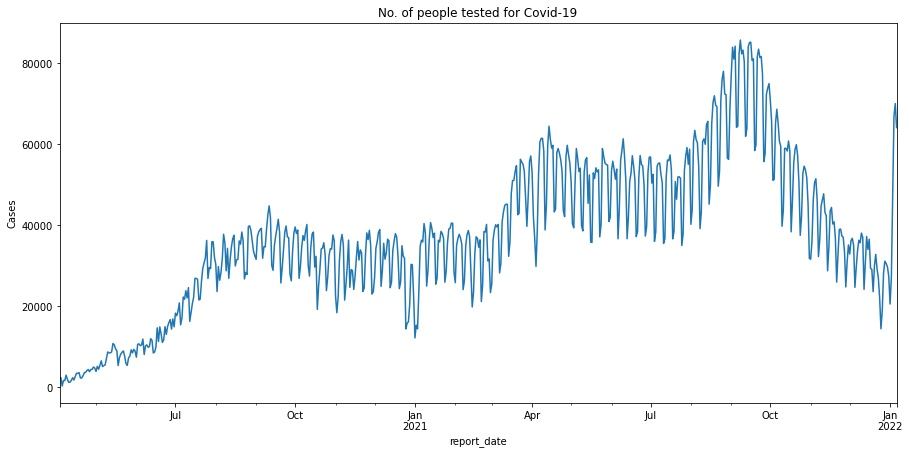

In [89]:
ax= df_test.resample('D', on='report_date').daily_output_unique_individuals.sum().plot(title="No. of people tested for Covid-19", figsize = (15, 7))
ax.set_ylabel("Cases")


Interpretation: Number of people getting tested for Covid-19 daily have gone down
from their September peak of about 80,000 during a surge. 

# Total samples tested each day

Number of samples may differ from number of individuals tested because some people undertake more than one test for confirmation.

In [90]:
df_test.resample('D', on='report_date').daily_output_samples_tested.sum().sort_values(ascending=False).tail(10)

report_date
2020-04-20    2539.0
2020-04-03    2307.0
2020-04-09    2031.0
2020-04-14    1974.0
2020-04-12    1973.0
2020-04-07    1760.0
2020-04-06    1719.0
2020-04-11    1348.0
2020-04-10    1265.0
2020-04-05     432.0
Name: daily_output_samples_tested, dtype: float64

# Two-week rolling average in testing

In [91]:
df_test.resample('D', on='report_date').daily_output_unique_individuals.sum().rolling(14).mean().round().tail(20)

report_date
2021-12-18    32622.0
2021-12-19    32546.0
2021-12-20    32577.0
2021-12-21    32518.0
2021-12-22    32012.0
2021-12-23    31394.0
2021-12-24    30244.0
2021-12-25    28633.0
2021-12-26    28257.0
2021-12-27    28066.0
2021-12-28    27631.0
2021-12-29    27383.0
2021-12-30    26894.0
2021-12-31    26751.0
2022-01-01    26142.0
2022-01-02    26394.0
2022-01-03    27592.0
2022-01-04    30028.0
2022-01-05    32946.0
2022-01-06    35597.0
Freq: D, Name: daily_output_unique_individuals, dtype: float64

<AxesSubplot:title={'center':'Two week rolling average in testing'}, xlabel='report_date'>

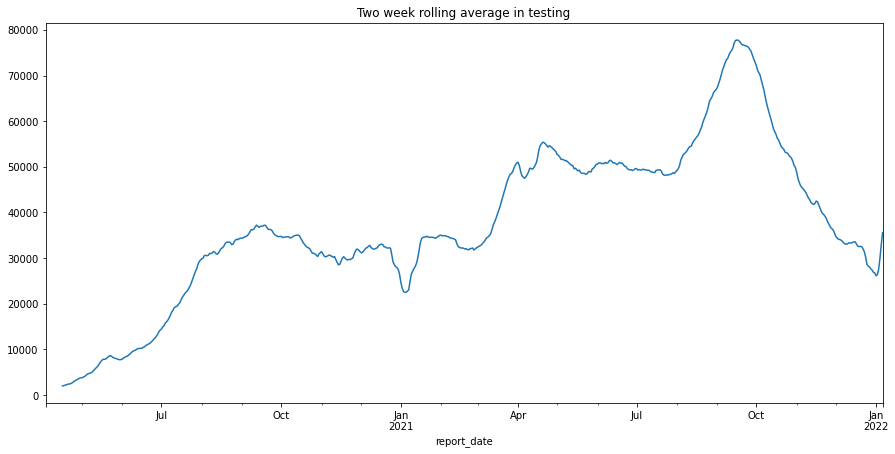

In [92]:
df_test.resample('D', on='report_date').daily_output_unique_individuals.sum().rolling(14).mean().plot(title='Two week rolling average in testing', figsize = (15, 7))


# How many people are tested each month?

### Monthly totals arranged from highest to lowest

Remove **sort_values(ascending=False)** to arrange it by date.

In [93]:
df_test.resample('M', on='report_date').daily_output_unique_individuals.sum().sort_values(ascending=False)

report_date
2021-09-30    2270631.0
2021-08-31    1876508.0
2021-10-31    1674413.0
2021-04-30    1571579.0
2021-07-31    1534758.0
2021-05-31    1525652.0
2021-06-30    1511158.0
2021-03-31    1378549.0
2021-11-30    1160857.0
2020-09-30    1073189.0
2020-10-31    1027587.0
2020-08-31    1017208.0
2021-01-31    1013071.0
2021-12-31     943211.0
2020-12-31     929690.0
2021-02-28     906997.0
2020-11-30     894039.0
2020-07-31     768793.0
2020-06-30     360407.0
2022-01-31     295792.0
2020-05-31     232175.0
2020-04-30      81089.0
Name: daily_output_unique_individuals, dtype: float64

<AxesSubplot:title={'center':'Testing slumps below 100k in Dec 2021'}, xlabel='report_date'>

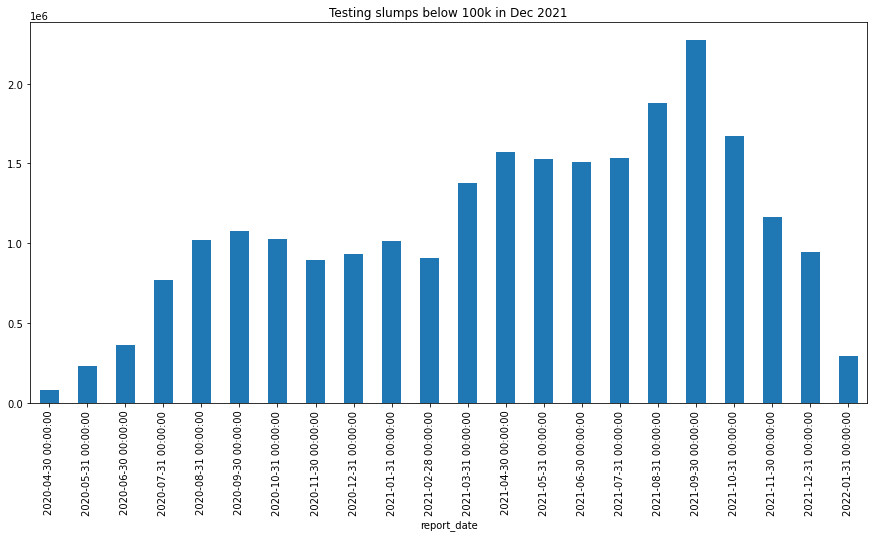

In [94]:
df_test.resample('M', on='report_date').daily_output_unique_individuals.sum().plot(kind="bar", title="Testing slumps below 100k in Dec 2021", figsize = (15, 7))


# Where do most positive individuals get tested?

Top 25

### Cumulative

In [95]:
df_test.groupby("facility_name").daily_output_positive_individuals.sum().sort_values(ascending=False).head(25)

facility_name
Philippine Red Cross - Port Area                                          155238.0
Detoxicare Molecular Diagnostics Laboratory                               149953.0
Philippine Red Cross (PRC)                                                 92964.0
Research Institute for Tropical Medicine (RITM)                            75382.0
Philippine Red Cross Logistics & Multipurpose Center                       71348.0
Baguio General Hospital and Medical Center                                 70142.0
Jose B. Lingad Memorial General Hospital                                   63990.0
Chinese General Hospital                                                   60553.0
Cebu TB Reference Laboratory - Molecular Facility for COVID-19 Testing     58122.0
Cagayan Valley Medical Center Molecular Laboratory                         54186.0
Southern Philippines Medical Center (SPMC)                                 51541.0
Ilocos Training and Regional Medical Center                              

### Monthly 

Ranked from highest to lowest number of tests.

In [96]:
df_test.groupby("facility_name").resample('M', on='report_date').daily_output_positive_individuals.sum().sort_values(ascending=False).head(25)


facility_name                                                           report_date
Philippine Red Cross - Port Area                                        2021-09-30     27547.0
                                                                        2021-08-31     23943.0
Detoxicare Molecular Diagnostics Laboratory                             2021-09-30     21316.0
Philippine Red Cross - Port Area                                        2021-04-30     20038.0
Detoxicare Molecular Diagnostics Laboratory                             2021-04-30     18665.0
Philippine Red Cross (PRC)                                              2021-09-30     18480.0
Ilocos Training and Regional Medical Center                             2021-09-30     17270.0
Baguio General Hospital and Medical Center                              2021-09-30     15865.0
Philippine Red Cross - Port Area                                        2021-03-31     15852.0
Detoxicare Molecular Diagnostics Laboratory                  

### Per testing site

Just change the name of the testing site after **df2.facility_name** to check other facilities.
Data show total monthly tests conducted per each facility.

In [97]:
df_test[df_test.facility_name=="Philippine Red Cross - Port Area"].resample('M', on='report_date').daily_output_positive_individuals.sum()


report_date
2020-05-31      205.0
2020-06-30      482.0
2020-07-31     7488.0
2020-08-31    10269.0
2020-09-30     8200.0
2020-10-31     1880.0
2020-11-30     2090.0
2020-12-31     2090.0
2021-01-31     1585.0
2021-02-28     3189.0
2021-03-31    15852.0
2021-04-30    20038.0
2021-05-31     8407.0
2021-06-30     4583.0
2021-07-31     5584.0
2021-08-31    23943.0
2021-09-30    27547.0
2021-10-31     4570.0
2021-11-30     1031.0
2021-12-31     1158.0
2022-01-31     5047.0
Freq: M, Name: daily_output_positive_individuals, dtype: float64

# How many individuals test positive every day?

In [98]:
df_test.resample('D', on='report_date').daily_output_positive_individuals.sum().tail(25)

report_date
2021-12-13      314.0
2021-12-14      359.0
2021-12-15      335.0
2021-12-16      330.0
2021-12-17      230.0
2021-12-18      225.0
2021-12-19      201.0
2021-12-20      278.0
2021-12-21      362.0
2021-12-22      398.0
2021-12-23      418.0
2021-12-24      453.0
2021-12-25      315.0
2021-12-26      481.0
2021-12-27     1271.0
2021-12-28     2062.0
2021-12-29     3155.0
2021-12-30     4391.0
2021-12-31     5475.0
2022-01-01     4284.0
2022-01-02     7434.0
2022-01-03    15216.0
2022-01-04    25092.0
2022-01-05    28041.0
2022-01-06    27814.0
Freq: D, Name: daily_output_positive_individuals, dtype: float64

# Turnaround time

The number of people that test positive each day does not match cases reported each day. And it's partly because of delays in testing results. Hence some results reported today could be from tests days ago. What's the average turnaround time in hours for tests?

In [99]:
df_test.avg_turnaround_time.value_counts().head(3)

48.0    36397
24.0    30489
72.0     7610
Name: avg_turnaround_time, dtype: int64

# Positivity rate

Computed by dividing the number of positive tests out of the total tests conducted each day. The World Health Organization considers 5% and below positivity rate as the virus spread being under control.

### Daily

We make a new dataframe for positivity rate for faster processing of data in succeeding analysis.
(Also, it throws an error merely putting **.plot()** at this code so making a new df for this solve that problem.
Below we only show the positivity rate for the last 30 days.

In [100]:
df_pos = df_test.resample('D', on='report_date').daily_output_positive_individuals.sum() / df_test.resample('D', on='report_date').daily_output_unique_individuals.sum() * 100
df_pos.tail(30)

report_date
2021-12-08     1.293625
2021-12-09     1.137319
2021-12-10     1.243801
2021-12-11     1.031485
2021-12-12     0.880056
2021-12-13     1.015918
2021-12-14     0.963396
2021-12-15     0.983530
2021-12-16     0.901492
2021-12-17     0.782739
2021-12-18     0.772957
2021-12-19     0.850146
2021-12-20     0.925310
2021-12-21     1.101576
2021-12-22     1.360916
2021-12-23     1.545344
2021-12-24     2.058249
2021-12-25     2.175414
2021-12-26     2.540940
2021-12-27     4.501505
2021-12-28     6.615123
2021-12-29    10.314165
2021-12-30    14.751235
2021-12-31    19.992697
2022-01-01    20.814304
2022-01-02    27.365089
2022-01-03    32.496850
2022-01-04    37.471439
2022-01-05    40.000285
2022-01-06    43.353700
Freq: D, dtype: float64

Text(0, 0.5, 'Positivity rate (%)')

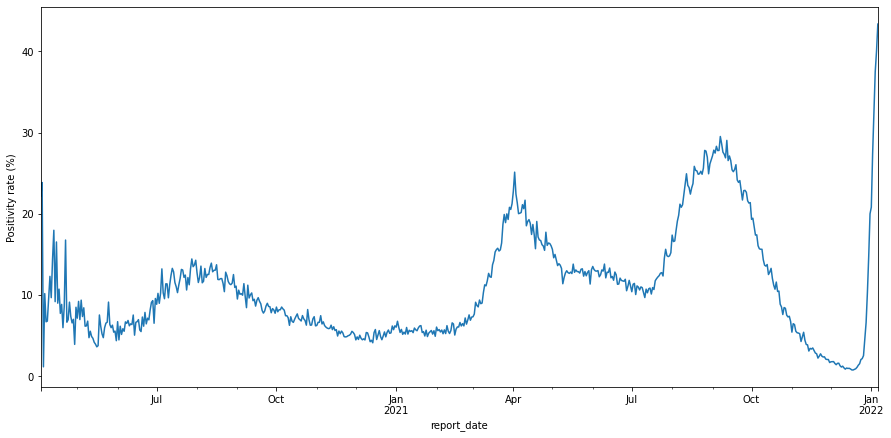

In [101]:
ax = df_pos.plot(figsize = (15, 7))
ax.set_ylabel("Positivity rate (%)")

# Save to CSVs

Just remove the hashtags!

While your testing data is in one CSV, cases are not. So now, you have the option to save it into one CSV. Note that you do not need to do this if you're using the dataframes (df) you generated above to process the data in Jupyter Notebook anytime.

### Entire case file from DOH

In [44]:
#df.to_csv("covidcases.csv", index=False)
#pd.read_csv("covidcases.csv")

### Provincial cases per day

In [45]:
#df_prov.to_csv("covid_prov.csv")
#pd.read_csv("covid_prov.csv")

### Municipal cases total

In [ ]:
#df_munc.to_csv("covid_munc.csv")
#pd.read_csv("covid_munc.csv")